In [1]:
# Import Required Libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


2025-02-13 16:18:57.494658: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-13 16:18:57.494794: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-13 16:18:57.494838: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-13 16:18:58.843106: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Define Paths
dataset_path = "food-101/images"  # Change this path if necessary

In [4]:
# Set Up Data Generators
img_size = (299, 299)  # InceptionV3 input size
batch_size = 32  # You can adjust based on your GPU

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="validation"
)

num_classes = len(train_generator.class_indices)


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [5]:
# Load Pretrained InceptionV3
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(299, 299, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation="softmax")(x)

# Create model
model = Model(inputs=base_model.input, outputs=output_layer)

87910968/87910968 [==============================] - 2s 0us/step


In [6]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [7]:
epochs = 10  # Start small to test
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)


Epoch 1/10
2525/2525 [==============================] - 7311s 3s/step - loss: 4.6272 - accuracy: 0.0130 - val_loss: 4.5793 - val_accuracy: 0.0214
Epoch 2/10
2525/2525 [==============================] - 11593s 5s/step - loss: 4.5672 - accuracy: 0.0196 - val_loss: 4.5202 - val_accuracy: 0.0265
Epoch 3/10
2525/2525 [==============================] - 9313s 4s/step - loss: 4.5275 - accuracy: 0.0240 - val_loss: 4.4800 - val_accuracy: 0.0311
Epoch 4/10
2525/2525 [==============================] - 9638s 4s/step - loss: 4.4977 - accuracy: 0.0275 - val_loss: 4.4457 - val_accuracy: 0.0379
Epoch 5/10
2525/2525 [==============================] - 8880s 4s/step - loss: 4.4705 - accuracy: 0.0308 - val_loss: 4.4154 - val_accuracy: 0.0423
Epoch 6/10
2525/2525 [==============================] - 8979s 4s/step - loss: 4.4423 - accuracy: 0.0338 - val_loss: 4.3853 - val_accuracy: 0.0470
Epoch 7/10
2525/2525 [==============================] - 6644s 3s/step - loss: 4.4209 - accuracy: 0.0364 - val_loss: 4.3605 

In [ ]:
# Evaluate the Model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")


632/632 [==============================] - 601s 951ms/step - loss: 4.2958 - accuracy: 0.0622
Validation Accuracy: 0.06


In [ ]:
# Save the Model
model.save("food101_inceptionv3full.h5")


/opt/jupyterhub/pyvenv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


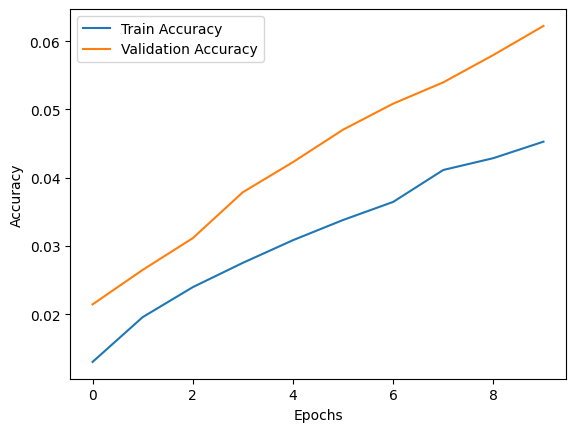

In [ ]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
